In [183]:
pip install emoji --upgrade

Note: you may need to restart the kernel to use updated packages.


In [184]:
pip install contractions

Note: you may need to restart the kernel to use updated packages.


In [185]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [186]:
pip install googletrans==4.0.0-rc1

Note: you may need to restart the kernel to use updated packages.


In [187]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [188]:
pip install langdetect

Note: you may need to restart the kernel to use updated packages.


In [189]:
# pip install googletrans 3.1.0a0

In [190]:
pip install deep-translator

Note: you may need to restart the kernel to use updated packages.


In [191]:
pip install lightgbm

In [192]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
import emoji
import contractions

from deep_translator import GoogleTranslator
from langdetect import detect

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer

import time
import string

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [194]:
import warnings
warnings.filterwarnings("ignore")

In [195]:
df = pd.read_csv("E:/download/airline_sentiment_analysis.csv")
df.head()
print(df.shape)

(11541, 3)


In [196]:
df.drop('Unnamed: 0', axis = 1, inplace = True) # Dropping it so to get row numbers without discountinuity
df.drop_duplicates(inplace = True)
df.shape

(11385, 2)

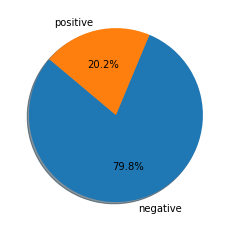

In [197]:
sentiment_count = df["airline_sentiment"].value_counts()
plt.pie(sentiment_count, labels=sentiment_count.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

In [198]:
print("Number of + tweets: {}".format(df[df["airline_sentiment"]=="positive"].count()[0]))
print("Number of - tweets: {}".format(df[df["airline_sentiment"]=="negative"].count()[0]))

Number of + tweets: 2298
Number of - tweets: 9087


**Data is biased.**

In [199]:
df.sample(10)

,airline_sentiment,text
11510,negative,@AmericanAir Has AA Flight 296 from San Antoni...
1323,negative,"@united ... I want my bag off flight 1142, wha..."
4212,negative,@SouthwestAir Pls help. On hold 4 long time no...
4218,negative,@SouthwestAir are any flights leaving DC today...
9881,positive,@AmericanAir TPA - ORD!!! AA1679 Another succ...
5338,negative,@jetblue any idea what caused the delay on fli...
4629,negative,@SouthwestAir suggestion- shades on the window...
10810,negative,@AmericanAir cost me 1 day of #vacation ($350)...
10689,negative,@AmericanAir FINALLY called me back... BUT HAS...
2678,positive,@united kind of cool to run into your boss man...


In [200]:
df['text'].str.contains('RT').sum()

55

There are retweets in the data as well

## Pre Processing

In [201]:
pip install langdetect

Note: you may need to restart the kernel to use updated packages.


In [202]:
# from langdetect import detect

# print(detect("Geeksforgeeks is a computer science portal for geeks"))

In [203]:
def detect_and_translate(tweet):
  if detect(tweet) == 'en':
    return tweet
  else:
    translated = GoogleTranslator(source='auto', target='en').translate(tweet)
    return translated

In [204]:
def replace_retweet(tweet, default_replace=""):
  tweet = re.sub('RT\s+', default_replace, tweet)
  return tweet

In [205]:
def replace_user(tweet, default_replace="twitteruser"):
  tweet = re.sub('\B@\w+', default_replace, tweet)
  return tweet

In [206]:
def demojize(tweet):
  tweet = emoji.demojize(tweet)
  return tweet

In [207]:
def replace_url(tweet, default_replace=""):
  tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)
  return tweet

In [208]:
def replace_hashtag(tweet, default_replace=""):
  tweet = re.sub('#+', default_replace, tweet)
  return tweet

In [209]:
def to_lowercase(tweet):
  tweet = tweet.lower()
  return tweet

In [210]:
def word_repetition(tweet):
  tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
  return tweet

In [211]:
def punct_repetition(tweet, default_replace=""):
  tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, tweet)
  return tweet

In [212]:
def fix_contractions(tweet):
  tweet = contractions.fix(tweet)
  return tweet

In [213]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'in', 'themselves', 'been', 'did', 'were', 'how', 'again', 's', "isn't", "it's", 'yourselves', 'you', 'or', "hadn't", 'shouldn', 'and', 'why', 'same', 'being', 'when', 'was', 'over', 'more', 'just', "shan't", 'ma', "you'd", 'm', "you'll", "wasn't", 'hers', 'o', 'd', 'down', 'these', 'of', 'which', 'is', "didn't", 'they', 'further', 'an', 'herself', 'to', 'll', 'below', 'mightn', 'above', 'wouldn', 'for', 'he', 'mustn', 'about', 'won', 've', 'wasn', "mightn't", "wouldn't", 'me', 'while', 'didn', 'had', 'once', 'doesn', 'then', 'all', 'those', 'shan', 'itself', 'nor', 'here', "hasn't", 'there', 'will', 'where', 'can', 'but', 'most', 'we', 'own', 't', 'because', 'yourself', 'yours', 'than', 'very', 'only', 'isn', 'both', 'hadn', 'our', 'a', 'that', 'them', 'no', 'having', 'don', 'should', 'y', "doesn't", 'during', 'she', 'other', 'needn', "mustn't", 'up', "won't", 'by', 'weren', 'aren', 'with', 'haven', 'has', "you've", 'doing', "needn't", 'the', 'so', "shouldn't", 'any', 'ours', 'some',

In [214]:
print(len(stop_words))

179


In [215]:
stop_words.discard('not')
print(stop_words)

{'in', 'themselves', 'been', 'did', 'were', 'how', 'again', 's', "isn't", "it's", 'yourselves', 'you', 'or', "hadn't", 'shouldn', 'and', 'why', 'same', 'being', 'when', 'was', 'over', 'more', 'just', "shan't", 'ma', "you'd", 'm', "you'll", "wasn't", 'hers', 'o', 'd', 'down', 'these', 'of', 'which', 'is', "didn't", 'they', 'further', 'an', 'herself', 'to', 'll', 'below', 'mightn', 'above', 'wouldn', 'for', 'he', 'mustn', 'about', 'won', 've', 'wasn', "mightn't", "wouldn't", 'me', 'while', 'didn', 'had', 'once', 'doesn', 'then', 'all', 'those', 'shan', 'itself', 'nor', 'here', "hasn't", 'there', 'will', 'where', 'can', 'but', 'most', 'we', 'own', 't', 'because', 'yourself', 'yours', 'than', 'very', 'only', 'isn', 'both', 'hadn', 'our', 'a', 'that', 'them', 'no', 'having', 'don', 'should', 'y', "doesn't", 'during', 'she', 'other', 'needn', "mustn't", 'up', "won't", 'by', 'weren', 'aren', 'with', 'haven', 'has', "you've", 'doing', "needn't", 'the', 'so', "shouldn't", 'any', 'ours', 'some',

In [216]:
print(len(stop_words))

178


In [217]:
def custom_tokenize(tweet,
                    keep_punct = False,
                    keep_alnum = False,
                    keep_stop = False):
  
  token_list = word_tokenize(tweet)

  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation]

  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()]
  
  if not keep_stop:
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words]

  return token_list

In [218]:
def stem_tokens(tokens, stemmer):
  token_list = []
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list



1.   Don't use lemmatization as the increased performance to increased cost ratio is quite low
2.   Lemmatization has no significant impact on accuracy for text classification with neural architectures



In [219]:
def process_tweet(tweet, verbose=False):
  if verbose: print("Initial tweet: {}".format(tweet))

  ## Twitter Features
  tweet = replace_retweet(tweet) # replace retweet
  tweet = replace_user(tweet, "") # replace user tag to null
  tweet = replace_url(tweet) # replace url
  tweet = replace_hashtag(tweet) # replace hashtag
  tweet = detect_and_translate(tweet) # change language to english

  ## Word Features
  tweet = to_lowercase(tweet) # lower case
  tweet = fix_contractions(tweet) # replace contractions
  tweet = punct_repetition(tweet) # replace punctuation repetition
  tweet = word_repetition(tweet) # replace word repetition
  tweet = demojize(tweet) # replace emojis

  ## Tokenization & Stemming
  tokens = custom_tokenize(tweet) # tokenize
  stemmer = SnowballStemmer("english") # define stemmer
  stem = stem_tokens(tokens, stemmer) # stem tokens

  return stem

In [220]:
df['text']

0        @VirginAmerica plus you've added commercials t...
1        @VirginAmerica it's really aggressive to blast...
2        @VirginAmerica and it's a really big bad thing...
3        @VirginAmerica seriously would pay $30 a fligh...
4        @VirginAmerica yes, nearly every time I fly VX...
                               ...                        
11536    @AmericanAir my flight was Cancelled Flightled...
11537           @AmericanAir right on cue with the delays👌
11538    @AmericanAir thank you we got on a different f...
11539    @AmericanAir leaving over 20 minutes Late Flig...
11540    @AmericanAir you have my money, you change my ...
Name: text, Length: 11385, dtype: object

### Text Representation

In [221]:
df["tokens"] = df['text'].apply(process_tweet)
df["sentiment"] = df["airline_sentiment"].apply(lambda i: 1
                                              if i == "positive" else 0)

In [222]:
df.head(10)

,airline_sentiment,text,tokens,sentiment
0,positive,@VirginAmerica plus you've added commercials t...,"[plus, ad, commerci, experi, tacki]",1
1,negative,@VirginAmerica it's really aggressive to blast...,"[realli, aggress, blast, obnoxi, entertain, gu...",0
2,negative,@VirginAmerica and it's a really big bad thing...,"[realli, big, bad, thing]",0
3,negative,@VirginAmerica seriously would pay $30 a fligh...,"[serious, would, pay, flight, seat, not, play,...",0
4,positive,"@VirginAmerica yes, nearly every time I fly VX...","[yes, near, everi, time, fli, vx, ear, worm, n...",1
5,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D",[well],1
6,positive,"@VirginAmerica it was amazing, and arrived an ...","[amaz, arriv, hour, earli, good]",1
7,positive,@VirginAmerica I &lt;3 pretty graphics. so muc...,"[lt, pretti, graphic, much, better, minim, ico...",1
8,positive,@VirginAmerica This is such a great deal! Alre...,"[great, deal, alreadi, think, trip, amp, not, ...",1
9,positive,@VirginAmerica @virginmedia I'm flying your #f...,"[fli, fabul, seduct, sky, take, stress, away, ...",1


Removing biaseness in the data

In [223]:
X = df["tokens"]
y = df["sentiment"]

# X = X.to_list()
# y = y.to_list()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=0)

In [224]:
def fit_cv(tweet_corpus):
  cv_vect = CountVectorizer(tokenizer=lambda x: x,
                            preprocessor=lambda x: x)
  cv_vect.fit(tweet_corpus)
  return cv_vect

In [225]:
def fit_tfidf(tweet_corpus):
  tf_vect = TfidfVectorizer(preprocessor=lambda x: x,
                            tokenizer=lambda x: x)
  tf_vect.fit(tweet_corpus)
  return tf_vect

In [226]:
def oversample_smote(X, y):
  oversample = SMOTE()
  X, y = oversample.fit_resample(X, y)
  return X, y

Count vectorizer representation

In [227]:
# cv = fit_cv(X_train)
# X_train_cv = cv.transform(X_train)
# X_test_cv = cv.transform(X_test)

In [228]:
model_cv = {}
def model_training_cv(X_train, y_train, model):
  cv = fit_cv(X_train)
  X_train_cv = cv.transform(X_train)
  X_test_cv = cv.transform(X_test)
  X_train_cv, y_train_sm = oversample_smote(X_train_cv , y_train)
  model = model
  start_time = time.time()
  model.fit(X_train_cv, y_train_sm)
  end_time = time.time()
  time_taken = end_time - start_time
  y_pred_lr_cv = model.predict(X_test_cv)
  acc = accuracy_score(y_test, y_pred_lr_cv)
  return time_taken , acc

In [229]:
model_tf = {}
def model_training_tf(X_train, y_train, model):
  tf = fit_tfidf(X_train)
  X_train_tf = tf.transform(X_train)
  X_test_tf = tf.transform(X_test)
  X_train_tf, y_train_sm = oversample_smote(X_train_tf , y_train)
  model = model
  start_time = time.time()
  model.fit(X_train_tf, y_train_sm)
  end_time = time.time()
  time_taken = end_time - start_time
  y_pred_cv = model.predict(X_test_tf)
  acc = accuracy_score(y_test, y_pred_cv)
  return time_taken , acc

In [230]:
time_taken , acc = model_training_cv(X_train, y_train, model = LogisticRegression())
model_cv['LogisticRegression'] = [time_taken , acc]

In [231]:
time_taken , acc = model_training_cv(X_train, y_train, model = XGBClassifier())
model_cv['XGBClassifier'] = [time_taken , acc]

In [232]:
# time_taken , acc = model_training_cv(X_train, y_train, model = LGBMClassifier())
# model_cv['LGBMClassifier'] = [time_taken , acc]

In [233]:
model_cv

{'LogisticRegression': [0.149078369140625, 0.8911134527572884],
 'XGBClassifier': [1.1612472534179688, 0.9020021074815595]}

In [234]:
time_taken , acc = model_training_tf(X_train, y_train, model = LogisticRegression())
model_tf['LogisticRegression'] = [time_taken , acc]

In [235]:
time_taken , acc = model_training_tf(X_train, y_train, model = XGBClassifier())
model_tf['XGBClassifier'] = [time_taken , acc]

In [236]:
model_tf

{'LogisticRegression': [0.14105486869812012, 0.9107832806462943],
 'XGBClassifier': [1.553647518157959, 0.9058658236740429]}

In [237]:
tf = fit_tfidf(X_train)
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

X_train_tf = X_train_tf.astype('float32')
X_test_tf = X_test_tf.astype('float32')   
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')
                       
X_train_tf, y_train_sm = oversample_smote(X_train_tf , y_train)
model = LGBMClassifier()
start_time = time.time()
model.fit(X_train_tf, y_train_sm)
end_time = time.time()
time_taken = end_time - start_time
y_pred_cv = model.predict(X_test_tf)
acc = accuracy_score(y_test, y_pred_cv)
model_tf['LGBMClassifier'] = [time_taken , acc]

In [238]:
model_tf

{'LogisticRegression': [0.14105486869812012, 0.9107832806462943],
 'XGBClassifier': [1.553647518157959, 0.9058658236740429],
 'LGBMClassifier': [2.1969592571258545, 0.9051633298208641]}

In [239]:
grid={"C":np.logspace(-3,3,10), 
      "penalty":["l1","l2"],    # l1 lasso l2 ridge
      'tol':[0.01,0.001,0.0001],
      'max_iter':[100,150,200]
     }

logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_tf, y_train_sm)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 46.41588833612773, 'max_iter': 150, 'penalty': 'l2', 'tol': 0.01}
accuracy : 0.9589141599413059


In [240]:
model = RandomForestClassifier()
start = time.time()
model.fit(X_train_tf, y_train_sm)
end = time.time()
y_pred_cv = model.predict(X_test_tf)
acc = accuracy_score(y_test, y_pred_cv)
time_taken = end - start
print(time_taken , acc)


14.589818716049194 0.9023533544081489


In [241]:
model = SVC()
start = time.time()
model.fit(X_train_tf, y_train_sm)
end = time.time()
y_pred_cv = model.predict(X_test_tf)
acc = accuracy_score(y_test, y_pred_cv)
time_taken = end - start
print(time_taken , acc)

5.603048801422119 0.9121882683526519


In [242]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_tf, y_train_sm)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.664 total time=   5.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.903 total time=   6.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.961 total time=   6.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.970 total time=   6.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.970 total time=   6.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.731 total time=   8.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.837 total time=   9.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.864 total time=   9.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.866 total time=   9.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.866 total time=   9.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.546 total time=  11.5s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [243]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, gamma=1)


## Final Model training after hyperparameter tuning

In [244]:
X = df["tokens"]
y = df["sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=0)

tf = fit_tfidf(X_train)
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)
X_train_tf, y_train_sm = oversample_smote(X_train_tf , y_train)

model = SVC(C=100, gamma=1, kernel='rbf')
start = time.time()
model.fit(X_train_tf, y_train_sm)
end = time.time()
y_pred_cv = model.predict(X_test_tf)
acc = accuracy_score(y_test, y_pred_cv)
time_taken = end - start
print(time_taken , acc)

12.439643859863281 0.9174569722514928


In [245]:
X = df["tokens"]
y = df["sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=0)

tf = fit_tfidf(X_train)
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)
X_train_tf, y_train_sm = oversample_smote(X_train_tf , y_train)
                
model = LogisticRegression(C = 46.5, penalty = 'l2',max_iter = 100, tol = 0.01)
start = time.time()
model.fit(X_train_tf, y_train_sm)
end = time.time()
y_pred_cv = model.predict(X_test_tf)
acc = accuracy_score(y_test, y_pred_cv)
time_taken = end - start
print(time_taken , acc)

0.15558385848999023 0.9016508605549701


In [246]:
import pickle
filename = 'senlr.pkl'
pickle.dump(model, open(filename, 'wb'), protocol=2)

In [247]:
pip install dill

Note: you may need to restart the kernel to use updated packages.


In [248]:
import dill as pickle
pickle.dump(tf, open("tfidf.pickle", "wb"))

### Checking our model's accuracy from some samples

In [249]:
tweet = 'Trash service'
tweet = process_tweet(tweet)

In [250]:
print(tweet)

['trash', 'servic']


In [251]:
tweet = tf.transform(tweet)

In [252]:
print(tweet)

  (0, 4254)	0.637043806952177
  (0, 2335)	0.7708275994175854
  (1, 5725)	0.5245648294236186
  (1, 4254)	0.4449798565044572
  (1, 1596)	0.513237112374506
  (1, 750)	0.513237112374506


In [253]:
model.predict(tweet)

array([0, 0], dtype=int64)

In [254]:
tweet = 'very bad service'

tweet = process_tweet(tweet)

In [255]:
print(tweet)

['bad', 'servic']


In [256]:
tweet = tf.transform(tweet)

In [257]:
print(tweet)

  (0, 391)	1.0
  (1, 5725)	0.5245648294236186
  (1, 4254)	0.4449798565044572
  (1, 1596)	0.513237112374506
  (1, 750)	0.513237112374506


In [258]:
model.predict(tweet)

array([0, 0], dtype=int64)

In [259]:
probas = model.predict_proba(tweet)

In [260]:
print(probas)

[[0.99624848 0.00375152]
 [0.81236616 0.18763384]]


In [261]:
probas[:,0]

array([0.99624848, 0.81236616])